In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/AAPL.csv')
df.reindex(index=df.index[::-1])

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-05-18,5.064286,5.365714,4.998571,5.120000,4.432371,159180700
1,2005-05-19,5.111429,5.382857,5.111429,5.364286,4.643848,198290400
2,2005-05-20,5.321429,5.378572,5.312857,5.364286,4.643848,113162700
3,2005-05-23,5.407143,5.700000,5.407143,5.680000,4.917161,260643600
4,2005-05-24,5.635714,5.712857,5.575714,5.671429,4.909742,148365000
5,2005-05-25,5.642857,5.707143,5.617143,5.682857,4.919635,99001700
6,2005-05-26,5.705714,5.848571,5.705714,5.820000,5.038360,131380200
7,2005-05-27,5.805714,5.827143,5.715714,5.794286,5.016098,79002000
8,2005-05-31,5.808571,5.820000,5.654286,5.680000,4.917161,101051300
9,2005-06-01,5.698571,5.822857,5.694286,5.757143,4.983943,113453200


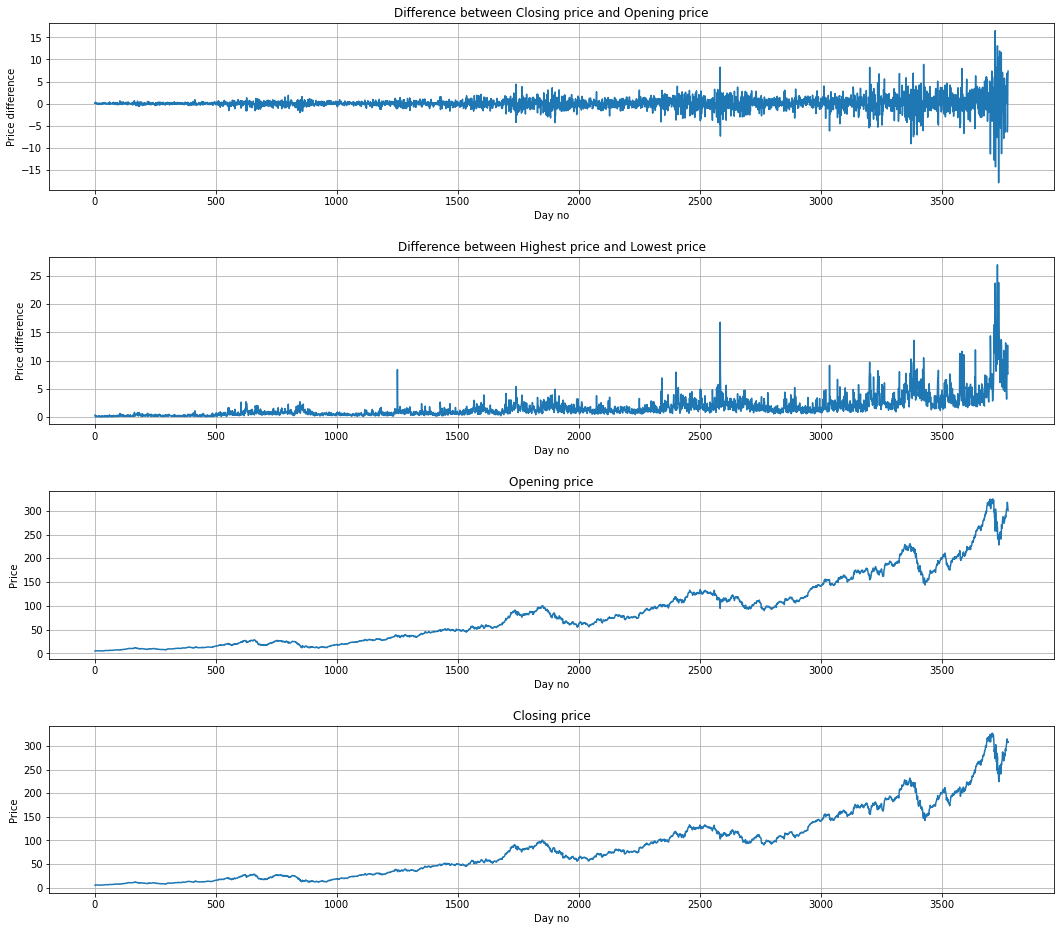

In [3]:
import matplotlib.pyplot as plt

def plotting_differences(dataframe_slice):

    fig = plt.figure(figsize=(18, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(4, 1, 1)
    plt.title('Difference between Closing price and Opening price')
    plt.plot(df['Close'] - df['Open'])
    plt.ylabel('Price difference')
    plt.xlabel('Day no')
    plt.grid()

    plt.subplot(4, 1, 2)
    plt.title('Difference between Highest price and Lowest price')
    plt.plot(df['High'] - df['Low'])
    plt.ylabel('Price difference')
    plt.xlabel('Day no')
    plt.grid()

    plt.subplot(4, 1, 3)
    plt.title('Opening price')
    plt.plot(df['Open'])
    plt.ylabel('Price')
    plt.xlabel('Day no')
    plt.grid()
    
    plt.subplot(4, 1, 4)
    plt.title('Closing price')
    plt.plot(df['Close'])
    plt.ylabel('Price')
    plt.xlabel('Day no')
    plt.grid()

    plt.savefig('./price-vis.png')
    plt.show()
    
plotting_differences(df)

In [4]:
def split_df(dataframe, chunk_len, step=1):
    return [dataframe[x-chunk_len:x] for x in range(chunk_len, len(df), step)]

chunks = split_df(df, 30)
chunks = list(map(lambda x: x.reset_index(), chunks))

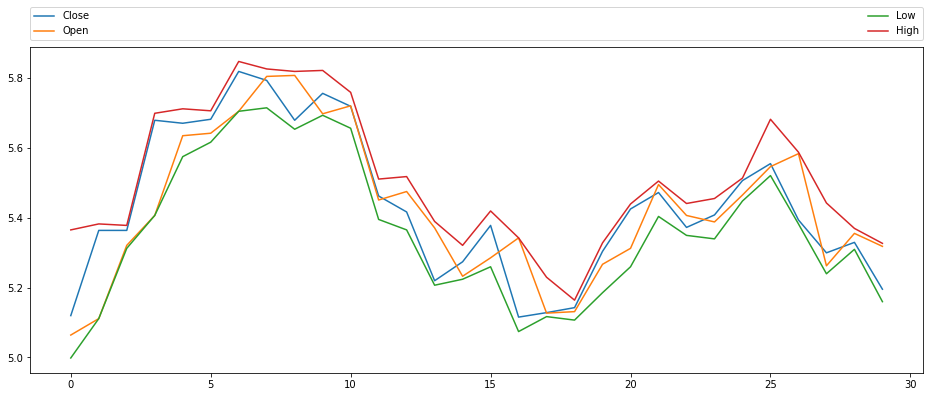

In [5]:
def plot_chunk(chunk):
    fig = plt.figure(figsize=(16, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.plot(chunk['Close'], label='Close')
    plt.plot(chunk['Open'], label='Open')
    plt.plot(chunk['Low'], label='Low')
    plt.plot(chunk['High'], label='High')
    
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    
plot_chunk(chunks[0])

(array([ 65.,  21., 103.]),
 array([-50,  -1,   1,  50]),
 <a list of 3 Patch objects>)

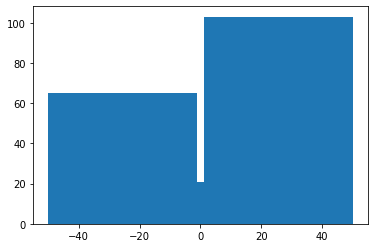

In [36]:
every_10th_opening = df['Open'].to_numpy()[0::10]

relative_changes = []
for (opening1, opening2) in zip(every_10th_opening[0::2], every_10th_opening[1::2]):
    relative_changes += [(opening2 - opening1) / opening1 * 100] # %
    
plt.hist(relative_changes, bins=[-50,-1,1,50])

In [68]:
import datetime
import time

daily_ts = lambda date: int(time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple())) * 1000

In [94]:
import plotly.graph_objects as go

start = 2000

observation_length = 200
prediction_after = 20
data_range = (start, start+observation_length)
pred_on = data_range[1] + prediction_after 

x_df = df[data_range[0]:data_range[1]]

fig = go.Figure()

fig.add_trace(
    go.Candlestick(x=x_df['Date'], 
                   open=x_df['Open'],
                   high=x_df['High'],
                   low=x_df['Low'],
                   close=x_df['Close'],
                   name="Features")
)

fig.add_trace(
    go.Scatter(x=[df['Date'][pred_on]],
               y=[df['Open'][pred_on]],
               name="Target",
               marker= {
                   'color': "red"
               })
)

shapes = [
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': daily_ts(df['Date'][data_range[1]]),
            'y0': df['Close'][data_range[1]],
            'x1': daily_ts(df['Date'][pred_on]),    
            'y1': df['Close'][data_range[1]],
            'line': {
                'color': 'LightSeaGreen',
                'width': 2,
                'dash': 'dashdot'
            }
        },
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': daily_ts(df['Date'][pred_on]),
            'y0': df['Close'][data_range[1]],
            'x1': daily_ts(df['Date'][pred_on]),    
            'y1': df['Open'][pred_on],
            'line': {
                'color': 'LightSeaGreen',
                'width': 2,
                'dash': 'dashdot'
            }
        }
    ]

fig.update_layout(
    title="Prediction process visualization",
    yaxis_title="Stock price",
    xaxis_title="Date",
    shapes=shapes
)

fig.show()

In [96]:
fig = go.Figure()

fig.add_trace(
    go.Candlestick(x=df['Date'], 
                   open=df['Open'],
                   high=df['High'],
                   low=df['Low'],
                   close=df['Close'],
                   name="Stock price")
)
fig.show()